In [1]:
import networkx as nx
import random
import timeit
from dwave_qbsolv import QBSolv
import numpy as np

In [2]:
import numpy as np
import math


n = int(input("Enter number of links in network: "))

Enter number of links in network: 100


In [63]:
#Arrival step
def arrivals(time,p_arrival):
    for i in range(n):
        if(np.random.rand()<=p_arrival):
            link_buf[i] += 1
            link_buf_without_transmit[i] += 1
            link_buf_arrival_times[i].append(time)    

In [64]:
def transmissions(connections,time):
    if(len(connections)>0):
        for i in range(len(connections)):
            if(link_buf[connections[i]]>0):
                link_buf[connections[i]] -= 1
                link_buf_transmit_times[i].append(time)

def get_connections(my_dict):
    connections_li = []
    for key, value in my_dict.items():
        if 1 == value:
            connections_li.append(key)
 
    return connections_li

In [67]:
arrivals(0,0)

link_buf

array([ 7.,  5.,  1.,  6.,  5.,  3.,  5.,  8.,  6.,  4.,  6.,  7.,  3.,
        7.,  7.,  0., 10.,  6., 10.,  1.,  5.,  5.,  1.,  6.,  0.,  4.,
        1., 10., 12.,  0.,  0., 10.,  7., 16.,  5.,  0.,  0.,  5.,  2.,
        6.,  2.,  9.,  2., 13.,  4., 10.,  3.,  2.,  6.,  6.,  2.,  7.,
        7.,  1.,  1.,  7.,  7.,  9.,  8.,  8.,  2.,  1., 12.,  3.,  0.,
        0.,  5.,  7.,  1., 10.,  2.,  3.,  0.,  1.,  4.,  8.,  3.,  0.,
       11.,  5.,  7.,  7.,  4.,  7., 12.,  0.,  4.,  2., 16.,  1., 12.,
       10.,  7.,  6.,  2.,  0.,  0.,  7.,  9.,  9.])

In [68]:
def form_QUBO(link_buf,conflict_set):
    
    max_queue = max(link_buf)
    
    Q = {}

    for i in range(n):
        Q[(i,i)] = -link_buf[i]
    
    counter = 0
    for conflict_list in conflict_set:
        for conflicting_link in conflict_list:
            Q[(counter,conflicting_link)] = 2*max_queue
        
        counter+=1
    
    return Q
    # print(Q)        

In [143]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
 
xMin=0
xMax=1
yMin=0
yMax=1
xDelta=xMax-xMin
yDelta=yMax-yMin
areaTotal=xDelta*yDelta;
 
# lambda0=10; #intensity (ie mean density) of the Poisson process
 
#Simulate Poisson point process
# numbPoints = scipy.stats.poisson( lambda0*areaTotal ).rvs()            #Poisson number of points

numbPoints = 100
xx = xDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+xMin         #x coordinates of Poisson points
yy = yDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+yMin         #y coordinates of Poisson points

# #Plotting
# plt.scatter(xx,yy, edgecolor='b', facecolor='none', alpha=0.5 )
# plt.xlabel("x"); plt.ylabel("y")

Text(0, 0.5, 'y')

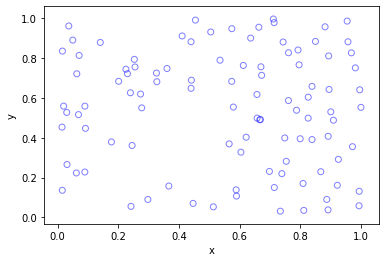

In [144]:
#Plotting
plt.scatter(xx,yy, edgecolor='b', facecolor='none', alpha=0.5 )
plt.xlabel("x"); plt.ylabel("y")

In [145]:
def check_connectivity(node_1,conflict_set,iterated_dict):  
    for node in conflict_set[node_1]:
        if(node in iterated_dict):
            continue
        else:    
            #print(node)
            iterated_dict[node] = 1
            check_connectivity(node,conflict_set,iterated_dict)

In [146]:
# r = math.sqrt(areaTotal/math.pi)/10
# conflict_set = []
# nodes_list = []
# edges_list = []
# for i in range(numbPoints):
#     temp_list = []
#     for j in range(numbPoints):
#         if((xx[i]-xx[j])**2 + (yy[i]-yy[j])**2 < r**2 and i!=j):
#             temp_list.append(j)
#     conflict_set.append(temp_list)       
    
# for i in range(numbPoints):
#     nodes_list.append(i)
#     for j in range(i):
#         if((xx[i]-xx[j])**2 + (yy[i]-yy[j])**2 < r**2 and i!=j):
#             edges_list.append([j,i])

# iterated_dict = {}
# iterated_dict[0]=1
# check_connectivity(0,conflict_set,iterated_dict)
# print(len(iterated_dict))
            


flag = True
counter = 1
while(flag):
    r = (math.sqrt(areaTotal/math.pi)/50)*counter
    counter += 1
    conflict_set = []
    nodes_list = []
    edges_list = []
    for i in range(numbPoints):
        temp_list = []
        for j in range(numbPoints):
            if((xx[i]-xx[j])**2 + (yy[i]-yy[j])**2 < r**2 and i!=j):
                temp_list.append(j)
        conflict_set.append(temp_list)       

    for i in range(numbPoints):
        nodes_list.append(i)
        for j in range(i):
            if((xx[i]-xx[j])**2 + (yy[i]-yy[j])**2 < r**2 and i!=j):
                edges_list.append([j,i])

    iterated_dict = {}
    iterated_dict[0]=1
    check_connectivity(0,conflict_set,iterated_dict)
    print(len(iterated_dict),r)
    if(len(iterated_dict)==numbPoints):
        flag = False
    

1 0.011283791670955126
1 0.022567583341910252
1 0.03385137501286538
1 0.045135166683820505
1 0.05641895835477563
1 0.06770275002573076
1 0.07898654169668588
1 0.09027033336764101
4 0.10155412503859614
4 0.11283791670955126
4 0.12412170838050639
4 0.1354055000514615
4 0.14668929172241663
4 0.15797308339337177
4 0.1692568750643269
100 0.18054066673528202


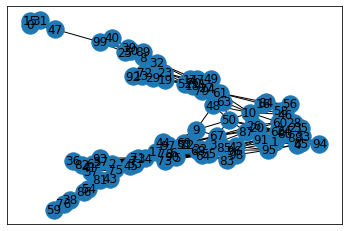

In [147]:
G = nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edges_list)
nx.draw_networkx(G)


In [148]:
r

0.18054066673528202

In [149]:
total_conflicts = 0
max_set = 0
for i in range(numbPoints):
    total_conflicts += len(conflict_set[i])
    if(len(conflict_set[i])>max_set):
        max_set = len(conflict_set[i])
        
(total_conflicts/numbPoints) 

8.38

In [150]:
buf_size = n
# p_arrival = 2*numbPoints/total_conflicts

link_buf = np.zeros(n)
link_buf_without_transmit = np.zeros(n)
link_buf_arrival_times = [ [] for i in range(n)]
link_buf_transmit_times = [ [] for i in range(n)]

link_buf
#np.random.randint(1,n-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
max_buf_vs_p_arrival = np.zeros([15,40])
p_a = []
min_arrival_rate = 1/(math.ceil(total_conflicts/numbPoints)+2)

for p in range(6):
    link_buf = np.zeros(n)
    link_buf_without_transmit = np.zeros(n)
    p_arrival = p*0.01 + min_arrival_rate
    print(p_arrival)
    
    for time_step in range(40):
        print(time_step)
        for time in range(200):

            arrivals(time,p_arrival)
            Q = form_QUBO(link_buf,conflict_set)
            print(time)
            # start_time = timeit.default_timer()
            response = QBSolv().sample_qubo(Q)
            # end_time = timeit.default_timer()
            # time_taken = end_time - start_time

            # print("Time taken = " + str(time_taken))
            Energies = list(response.data_vectors['energy'])
            pos = Energies.index(min(Energies))
            Samples = list(response.samples())
            # print(Energies[pos])
            # print(Samples[pos])


            connections_list = get_connections(Samples[pos])

        #     print(link_buf)

            transmissions(connections_list,time)

        #     print("\n")
        #     print("\n")

        #     print(connections_list)

        #     print("\n")
        #     print("\n")

        #     print(link_buf)

        #     print("\n")
        #     print("\n")
        max_val = np.max(link_buf)
        max_buf_vs_p_arrival[p][time_step] = max_val
    p_a.append(p_arrival)

0.09090909090909091
0
0
1


/home/pranav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: QBSolv is deprecated as of the end of 2021 and support will be discontinued after March 2022. Please update your code to use dwave-hybrid or Leap's quantum-classical hybrid solvers instead.


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
10

174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
13
0
1
2
3
4
5
6
7
8
9
10
11


In [114]:
latencies = np.zeros(n)
throughputs = np.zeros(n)

for i in range(n):
    throughputs[i] = link_buf_without_transmit[i] - link_buf[i]
#     for j in range(len(link_buf_transmit_times[i])):
#         latencies[i] += link_buf_transmit_times[i][j] - link_buf_arrival_times[i][j]
    

throughputs

array([ 5.,  7., 10.,  5.,  9.,  3.,  7.,  9.,  7.,  7.,  9.,  9.,  6.,
        3., 11.,  8., 10.,  7.,  8., 10., 12.,  7.,  8.,  8.,  9.,  8.,
       11.,  3.,  5.,  6.,  7.,  7.,  8., 10.,  9., 13.,  7.,  8.,  8.,
        4., 11., 10.,  7.,  4.,  5., 12.,  7.,  7., 15.,  6., 11.,  5.,
       11.,  8.,  8., 10.,  4.,  5., 11.,  5., 15.,  9.,  4.,  7.,  9.,
        8.,  4., 11.,  6.,  5.,  3.,  9.,  8., 14.,  5., 13.,  8.,  7.,
        7.,  7., 13.,  9.,  8., 11.,  5., 11.,  2.,  6.,  5., 15.,  8.,
        4.,  9., 13.,  7.,  5.,  9.,  8.,  7.,  9.])

In [115]:
link_buf_without_transmit

array([ 5.,  7., 10.,  5.,  9.,  3.,  7.,  9.,  7.,  7.,  9.,  9.,  6.,
        3., 11.,  8., 10.,  7.,  8., 10., 12.,  7.,  8.,  8.,  9.,  8.,
       11.,  3.,  5.,  6.,  7.,  8.,  8., 10.,  9., 13.,  7.,  8.,  8.,
        4., 11., 10.,  7.,  4.,  5., 13.,  7.,  7., 15.,  6., 11.,  5.,
       11.,  8.,  8., 10.,  4.,  5., 11.,  5., 15.,  9.,  4.,  7.,  9.,
        8.,  4., 11.,  6.,  6.,  3.,  9.,  9., 14.,  5., 13.,  8.,  7.,
        8.,  7., 13.,  9.,  8., 11.,  5., 11.,  2.,  6.,  5., 15.,  8.,
        4.,  9., 13.,  8.,  5., 10.,  9.,  7.,  9.])

In [116]:
link_buf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [117]:
max_buf_vs_p_arrival

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# p_a = []
# for p in range(15):
#     p_a.append(p*0.02)

t_a = [200*(i+1) for i in range(40)]

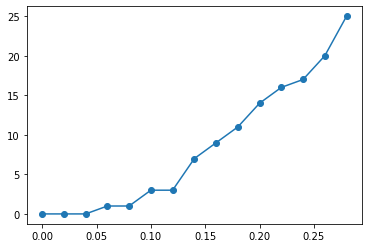

In [80]:
plt.plot(p_a,max_buf_vs_p_arrival,marker='o')

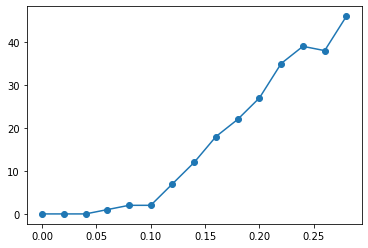

In [82]:
plt.plot(p_a,max_buf_vs_p_arrival,marker='o')

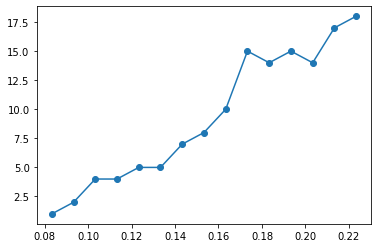

In [89]:
plt.plot(p_a,max_buf_vs_p_arrival[:,0],marker='o')

In [ ]:
plt.plot(t_a,max_buf_vs_p_arrival[0,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[1,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[2,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[3,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[4,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[5,:],marker='o')

plt.title("Varying rate of arrival (ra) and checking maximum buffer at links wrt time")
plt.xlabel("Time in iterations")
plt.ylabel("The maximum number of queued up packets")

plt.legend(["ra=0.09","ra=0.1","ra=0.11","ra=0.12","ra=0.13","ra=0.14"])
plt.show()

In [119]:


import gurobipy as gp
from gurobipy import *
def gurobi_optimize(Q):
    
    set_nodes = [i for i in range(0, n+1)]

    m = Model()
    gurobi_nodes = m.addVars(set_nodes, vtype=GRB.BINARY)
    
    val = gurobi_nodes[n]
    for index in Q:
        val += gurobi_nodes[index[0]]*gurobi_nodes[index[1]]*Q[index]
        
    m.setObjective(val, GRB.MINIMIZE) # Maximized number of boxes

    m.optimize()
    
    solution = {}
    
    for i in range(n):
        solution[i] = gurobi_nodes[i].X
        
    return solution        

In [ ]:
max_buf_vs_p_arrival = np.zeros([15,40])
p_a = []
min_arrival_rate = 1/(math.ceil(total_conflicts/numbPoints)+2)

for p in range(6):
    link_buf = np.zeros(n)
    link_buf_without_transmit = np.zeros(n)
    p_arrival = p*0.01 + min_arrival_rate
    print(p_arrival)
    
    for time_step in range(40):
        for time in range(200):

            arrivals(time,p_arrival)
            Q = form_QUBO(link_buf,conflict_set)
    #         print(time)
            
            connections_dict = gurobi_optimize(Q)
            connections_list = get_connections(connections_dict)
            
            transmissions(connections_list,time)

        #     print("\n")
        #     print("\n")

        #     print(connections_list)

        #     print("\n")
        #     print("\n")

        #     print(link_buf)

        #     print("\n")
        #     print("\n")
        max_val = np.max(link_buf)
        max_buf_vs_p_arrival[p][time_step] = max_val
    p_a.append(p_arrival)

In [ ]:
plt.plot(t_a,max_buf_vs_p_arrival[0,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[1,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[2,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[3,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[4,:],marker='o')
plt.plot(t_a,max_buf_vs_p_arrival[5,:],marker='o')

plt.title("Varying rate of arrival (ra) and checking maximum buffer at links wrt time")
plt.xlabel("Time in iterations")
plt.ylabel("The maximum number of queued up packets")

plt.legend(["ra=0.09","ra=0.1","ra=0.11","ra=0.12","ra=0.13","ra=0.14"])
plt.show()